# 이미지 분류
## 데이터 소개

### 데이터 불러오기

In [ ]:
# 라이브러리 임포트
import numpy as np

import torch
from torchvision import datasets

In [ ]:
# 학습 데이터셋 생성
train_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=True,
    download=True,
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 304kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.59MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.7MB/s]


In [ ]:
# 테스트 데이터 셋 생성
test_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,
    download=True,
)

In [ ]:
# 결과 확인
print(f'학습 데이터 개수: {len(train_dataset)}')
print(f'테스트 데이터 개수: {len(test_dataset)}')

학습 데이터 개수: 60000
테스트 데이터 개수: 10000


In [ ]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

### 데이터 구조

In [ ]:
# 시각화
import matplotlib.pyplot as plt

def visualize_data(image, label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap='gray')
    plt.xlabel(class_names[label])
    plt.show()

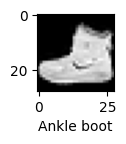

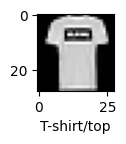

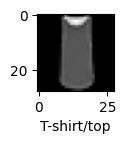

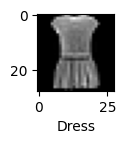

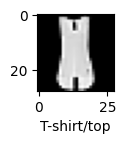

In [ ]:
for i in range(5):
    image = train_dataset[i][0]
    label = train_dataset[i][1]
    visualize_data(image, label)

In [ ]:
train_dataset[0][0]

In [ ]:
# 이미지 확인
pil_image = train_dataset[0][0]

type(pil_image)

PIL.Image.Image

### 이미지를 텐서로 변환

In [ ]:
# PIL image -> Tensor
from torchvision.transforms import v2

to_image = v2.ToImage()
image_tensor = to_image(pil_image)

image_tensor

Image([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
type(image_tensor)

torchvision.tv_tensors._image.Image

In [ ]:
image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
image_tensor.dtype

torch.uint8

### 데티어 타입 변환 및 스케일링

uint8->>float로 변환해야한다.

In [ ]:
# ToDtype
to_dtype = v2.ToDtype(dtype=torch.float32, scale=True)
image_tensor_float = to_dtype(image_tensor)

In [ ]:
image_tensor_float

Image([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

- **`dtype`**: 텐서의 데이터 타입(예: `torch.float32`).
- **`scale=True`**: 픽셀값을 0~1로 스케일링.

In [ ]:
print(f'dtype: {image_tensor_float.dtype}')  # torch.float32
print(f'max: {image_tensor_float.max()}')  # 1.0
print(f'min: {image_tensor_float.min()}')  # 0.0

dtype: torch.float32
max: 1.0
min: 0.0


### 여러 전처리 묶기 `Compose`

In [ ]:
transforms = v2.Compose(
    [
        v2.ToImage(),                                                   # PIL -> tensor로 변환
        v2.ToDtype(dtype=torch.float32, scale=True),                    # dtype 변환, 값을 0~1로 설정
    ]
)

In [ ]:
# compose 적용
image_tensor_compose = transforms(pil_image)

In [ ]:
# 결과 확인

print(f'type: {type(image_tensor_compose)}')  # torchvision.tv_tensors._image.Image
print(f'dtype: {image_tensor_compose.dtype}')  # torch.float32
print(f'max: {image_tensor_compose.max()}')  # 1.0
print(f'min: {image_tensor_compose.min()}')  # 0.0

type: <class 'torchvision.tv_tensors._image.Image'>
dtype: torch.float32
max: 1.0
min: 0.0


### 데이터셋 생성 시 전처리 적용

In [ ]:
train_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=True,
    download=True,
    transform=transforms,
)

test_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,
    download=True,
    transform=transforms,
)


In [ ]:
image_transformed = train_dataset[0][0]

print(f'type: {type(image_transformed)}')  # torchvision.tv_tensors._image.Image
print(f'dtype: {image_transformed.dtype}')  # torch.float32
print(f'max: {image_transformed.max()}')  # 표준화된 값
print(f'min: {image_transformed.min()}')

type: <class 'torchvision.tv_tensors._image.Image'>
dtype: torch.float32
max: 1.0
min: 0.0


### DNN 모델링

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 데이터셋 로드 및 전처리

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((-.5,),(0.5,))             # 픽셀 값을 [-1,1]로 정규화
])

train_dataset = datasets.FashionMNIST(
    root="./data", train=True, transform=transform, download=True
)
test_dataset = datasets.FashionMNIST(
    root="./data", train=False, transform=transform, download=True
)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader =DataLoader(test_dataset, batch_size=64, shuffle=False)

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# DNN 모델 정의
class DNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)                   # 28x28 이미지를 Flatten
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)                             # 출력층 (소프트맥스 적용 안 함, CrossEntropyLoss가 내부적으로 처리)
        return x

# 모델, 손실 함수 및 옵티마이저 설정
model = DNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 학습 함수
def train_model(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        train_loss = 0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_loss /= len(train_loader.dataset)
        accuracy = correct / total
        print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}, Accuracy: {accuracy:.4f}")

# 테스트 함수
def test_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    test_loss /= len(test_loader.dataset)
    accuracy = correct / total
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}")
    return test_loss, accuracy

# 학습 및 평가 실행
EPOCHS = 20
train_model(model, train_dataloader, criterion, optimizer, EPOCHS)
test_model(model, test_dataloader, criterion)

100%|██████████| 4.42M/4.42M [00:00<00:00, 5.60MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.46MB/s]


Using device: cpu
Epoch 1/20, Loss: 0.6606, Accuracy: 0.7529
Epoch 2/20, Loss: 0.4890, Accuracy: 0.8193
Epoch 3/20, Loss: 0.4407, Accuracy: 0.8375
Epoch 4/20, Loss: 0.4169, Accuracy: 0.8460
Epoch 5/20, Loss: 0.4000, Accuracy: 0.8506
Epoch 6/20, Loss: 0.3826, Accuracy: 0.8572
Epoch 7/20, Loss: 0.3692, Accuracy: 0.8614
Epoch 8/20, Loss: 0.3615, Accuracy: 0.8658
Epoch 9/20, Loss: 0.3487, Accuracy: 0.8693
Epoch 10/20, Loss: 0.3461, Accuracy: 0.8713
Epoch 11/20, Loss: 0.3348, Accuracy: 0.8758
Epoch 12/20, Loss: 0.3251, Accuracy: 0.8788
Epoch 13/20, Loss: 0.3220, Accuracy: 0.8781
Epoch 14/20, Loss: 0.3170, Accuracy: 0.8800
Epoch 15/20, Loss: 0.3113, Accuracy: 0.8817
Epoch 16/20, Loss: 0.3066, Accuracy: 0.8841
Epoch 17/20, Loss: 0.3040, Accuracy: 0.8856
Epoch 18/20, Loss: 0.2972, Accuracy: 0.8881
Epoch 19/20, Loss: 0.2979, Accuracy: 0.8871
Epoch 20/20, Loss: 0.2847, Accuracy: 0.8920
Test Loss: 0.3595, Test Accuracy: 0.8702


(0.35953599343299864, 0.8702)

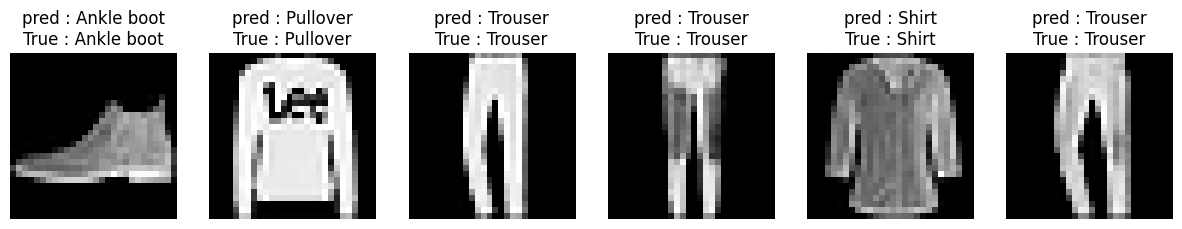

In [ ]:
# 결과 시각확

def visualize_predictions(model, test_loader, classes):
    model.eval()
    inputs, labels = next(iter(test_loader))
    inputs, labels = inputs.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

    inputs = inputs.cpu()
    preds = preds.cpu()
    ladels = labels.cpu()

    fig, axes = plt.subplots(1,6, figsize=(15, 5))
    for i in range(6):
        axes[i].imshow(inputs[i].squeeze(), cmap="gray")
        axes[i].set_title(f"pred : {classes[preds[i]]}\nTrue : {classes[labels[i]]}")
        axes[i].axis("off")
    plt.show()

# 클래스 이름
classes = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

visualize_predictions(model, test_dataloader, classes)

## 이미지 데이터 증강하기

### 데이터 증강이란?

- 기존 학습 데이터를 변형하여 **데이터 양을 효과적으로 늘리는 방법**입니다.
- 이미지 데이터의 경우, 이미지 반전, 회전, 자르기, 밝기 조정 등 다양한 방식으로 증강할 수 있습니다.

### 데이터 증강의 효과

- 학습 데이터 다양성을 높여 **오버피팅 방지**.
- 모델의 **일반화 성능** 향상.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2

In [ ]:
# flower 데이터 다운로드
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xvf ./flower_photos.tgz > /dev/null 2>&1

--2025-09-10 01:39:58--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.219.207, 108.177.12.207, 74.125.26.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.219.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   220MB/s    in 1.0s    

2025-09-10 01:39:59 (220 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



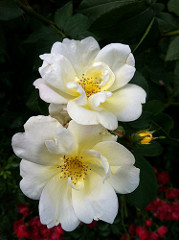

In [ ]:
image_flower = Image.open('/content/flower_photos/roses/10090824183_d02c613f10_m.jpg')
image_flower

In [ ]:
# 시각화 함수 정의
def visualize(input_image, transform):
    fig, axes = plt.subplots(2, 2, figsize=(6, 6))

    axes = axes.flatten()
    for ax in axes:
        ax.imshow(transform(input_image))
        ax.axis('off')

    plt.show()

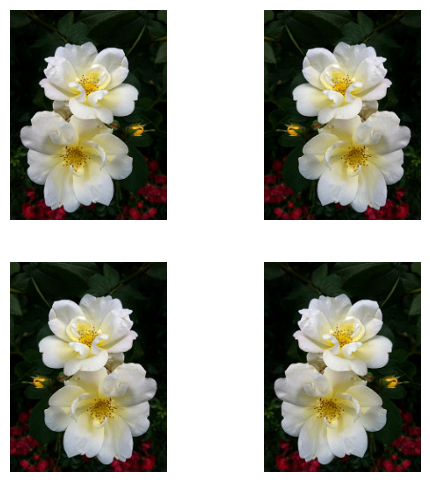

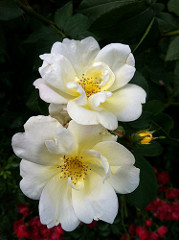

In [ ]:
# image 좌우 반전(반전이 일어날 확률 p)
hor_flip = v2.RandomHorizontalFlip(p=0.5)
visualize(image_flower, hor_flip)
hor_flip(image_flower)

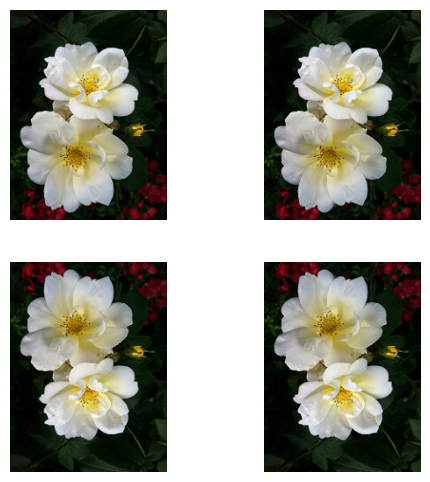

In [ ]:
# RandomVerticalFlip (이미지 상하 반점, 반전이 일어날 확률 P)
# 주의 : 상하반전은 자연스러운 이미지가 아닐 수 있으므로 잘 사용하지 않습니다.

ver_flip = v2.RandomVerticalFlip(p=0.5)
visualize(image_flower, ver_flip)

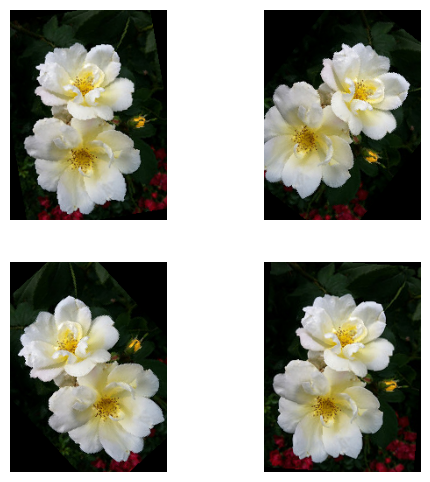

In [ ]:
# random rotation : 이미지를 시계 /반시계 방향으로 회전
# degree : 최대 회전 각도
rot = v2.RandomRotation(degrees=45)
visualize(image_flower, rot)

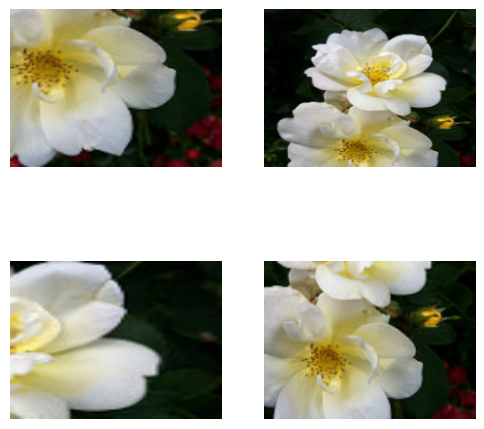

In [ ]:
# randomresizedcrop(이미지를 랜덤하게 자르고 리사이즈)
# size: 잘린 이미지를 리사이즈할 크기.
rrc = v2.RandomResizedCrop(size=image_flower.size)
visualize(image_flower, rrc)

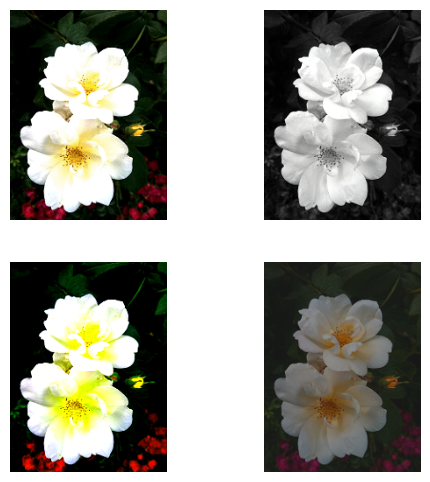

In [ ]:
# color jitter
jitter = v2.ColorJitter(brightness=0.5, contrast=0.5, saturation=2, hue=0.2)
visualize(image_flower, jitter)

### Compose
TorchVision의 Compose 객체를 활용해 여러 전처리 및 증강 기법을 결합할 수 있습니다.

In [ ]:
transforms_train = v2.Compose(
    [
        v2.ToImage(),  # PIL → Tensor
        v2.RandomHorizontalFlip(),
        v2.RandomResizedCrop(size=28),
        v2.RandomRotation(degrees=10),
        v2.ToDtype(dtype=torch.float32, scale=True),  # 0~1로 스케일링
        v2.Normalize(mean=[0.286], std=[0.353]),  # 표준화
    ]
)

In [ ]:
transforms_test = v2.Compose(
    [
        v2.ToImage(),  # PIL → Tensor
        v2.ToDtype(dtype=torch.float32, scale=True),  # 0~1로 스케일링
        v2.Normalize(mean=[0.286], std=[0.353]),  # 표준화
    ]
)


In [ ]:
from torchvision import datasets

train_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=True,
    download=True,
    transform=transforms_train,
)

test_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,
    download=True,
    transform=transforms_test,
)


### CNN 모델에 사용되는 레이어
### `Conv2d`
##### 기본 설정

```python
conv_layer = nn.Conv2d(
    in_channels=3,  # 입력 채널 수 (예: RGB 이미지면 3)
    out_channels=32,  # 출력 채널 수 (필터 개수)
    kernel_size=3,  # 커널 크기 (3x3 필터)
    stride=1,  # 필터 이동 간격
    padding=0,  # 입력 가장자리 패딩 크기
)

```

##### 주요 파라미터

- **`in_channels`**: 입력 데이터의 채널 수.
- **`out_channels`**: 출력 데이터의 채널 수 = 필터 개수.
- **`kernel_size`**: 필터 크기. (정수 → 정사각형, 튜플 → 직사각형 가능)
- **`stride`**: 필터 이동 간격. (기본값: 1)
- **`padding`**: 입력 가장자리를 채워 크기를 조정.
    - 0: 패딩 없음 (`valid`),
    - 1: 출력 크기 = 입력 크기 (`same`은 스트라이드 1에서만 적용 가능).


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

conv_layer = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)

In [ ]:
# 입력 데이터 생성
x = torch.randn(2, 3, 28, 28)  # 배치 크기: 2, 채널: 3, 크기: 28x28
y = conv_layer(x)

print(y.size())

torch.Size([2, 32, 28, 28])


### Pooling Layer

풀링 레이어는 데이터를 **다운샘플링**하여 크기를 줄이고, 중요한 정보를 추출합니다.

주요 방식:

- **맥스 풀링(Max Pooling)**: 윈도우 내 최댓값 선택.
- **애버리지 풀링(Average Pooling)**: 윈도우 내 평균값 선택.

In [ ]:
maxpool_layer = nn.MaxPool2d(kernel_size=2, stride=2)

In [ ]:
x = torch.randn(2, 3, 28, 28)
y = maxpool_layer(x)
print(y.size())  # torch.Size([2, 3, 14, 14])

torch.Size([2, 3, 14, 14])


In [ ]:
import torch.nn.functional as F

y = F.max_pool2d(x, kernel_size=2)
print(y.size())

torch.Size([2, 3, 14, 14])


In [ ]:
avgpool_layer = nn.AvgPool2d(
    kernel_size=2,
    stride=2,
    padding=0,
)

In [ ]:
x = torch.randn(2, 3, 28, 28)
y = avgpool_layer(x)
print(y.size())  # torch.Size([2, 3, 14, 14])

torch.Size([2, 3, 14, 14])


## CNN모델 만들기

In [85]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.maxpool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(64*7*7, 64)
        self.linear2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))                           # 첫 번째 컨볼루션 + 렐루 활성화
        x = self.maxpool(x)                                 # 맥스풀링
        x = F.relu(self.conv2(x))                           # 두 번째 컨볼루션 + 렐루 활성화
        x = self.maxpool(x)                                 # 맥스풀링
        x = self.flatten(x)                                 # 피처맵을 벡터로 펼침
        x = F.relu(self.linear1(x))                         # 첫 번째 리니어 + 렐루 활성화
        output = self.linear2(x)                            # 두 번째 리니어
        return output

# 모델 생성 및 테스트
model = CNNModel()
# x = torch.randn(2, 1, 28, 28)
# output = model(x)
# print(output.size())  # torch.Size([2, 10])

In [86]:
!pip install torchinfo

In [87]:
from torchinfo import summary
summary(model, input_size=(32, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [32, 10]                  --
├─Conv2d: 1-1                            [32, 32, 28, 28]          320
├─MaxPool2d: 1-2                         [32, 32, 14, 14]          --
├─Conv2d: 1-3                            [32, 64, 14, 14]          18,496
├─MaxPool2d: 1-4                         [32, 64, 7, 7]            --
├─Flatten: 1-5                           [32, 3136]                --
├─Linear: 1-6                            [32, 64]                  200,768
├─Linear: 1-7                            [32, 10]                  650
Total params: 220,234
Trainable params: 220,234
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 130.48
Input size (MB): 0.10
Forward/backward pass size (MB): 9.65
Params size (MB): 0.88
Estimated Total Size (MB): 10.63

##### 주요 파라미터

- **`nn.Conv2d`**
    - `in_channels`: 입력 채널 수 (예: 1 → 그레이스케일 이미지).
    - `out_channels`: 출력 채널 수 (필터 개수).
    - `kernel_size`: 필터 크기.
    - `stride`: 필터 이동 간격.
    - `padding`: 가장자리 패딩 크기.
- **`nn.MaxPool2d`**
    - `kernel_size`: 풀링 윈도우 크기.
    - `stride`: 풀링 윈도우 이동 간격.
- **`nn.Linear`**
    - `in_features`: 입력 차원.
    - `out_features`: 출력 차원.

##### 모델의 특징 요약

1. 두 개의 **컨볼루셔널 레이어**와 **맥스풀링 레이어**를 사용.
2. 중간에 **드롭아웃 레이어**로 오버피팅 방지.
3. 최종적으로 **Flatten**과 **리니어 레이어**로 10개의 클래스를 예측.

## 모델 학습 시키기

In [88]:
# 데이터셋과 전처리
# 학습 데이터에는 이미지 증강을 포함하고, 검증 데이터와 데스트데이터는 단순 전처리만 적용 합니다.

transforms_train = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomHorizontalFlip(),
        v2.RandomResizedCrop(size=28),
        v2.RandomRotation(degrees=10),
        v2.ToDtype(dtype=torch.float32, scale=True),
        v2.Normalize(mean=[0.286], std=[0.353]),
    ]
)

transforms_test = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
        v2.Normalize(mean=[0.286], std=[0.353]),
    ]
)

train_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=True,
    download=True,
    transform=transforms_train,
)

test_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,
    download=True,
    transform=transforms_test,
)

In [89]:
# 검증데이터 분할하기
# 검증 데이터를 만들기 위해 테스트 데이터셋을 랜덤하게 분할합니다.
# 검증 데이터는 이미지 증강이 포함되지 않은 데이터에서 분할하는 것이 좋습니다.

from torch.utils.data import random_split
val_dataset, test_dataset = random_split(test_dataset, [5000, 5000])

In [90]:
# 데이터로더 생성
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True, drop_last=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=32)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=32)

In [91]:
# 모델 준비

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.maxpool = nn.MaxPool2d(2, 2)
        # self.dropout = nn.Dropout(0, 2)
        self.flatten =nn.Flatten()
        self.linear1 = nn.Linear(3136, 64)
        self.linear2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        # x = self.dropout(x)
        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        output = self.linear2(x)
        return output

model = CNNModel()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=3136, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=10, bias=True)
)

In [92]:
import torch.optim as optim

# 손실함수와 옵티마이저 설정
loss_fn = nn.CrossEntropyLoss()                 # 분류 문데에 적합한 손실함수
optimizer = optim.Adam(model.parameters())      # 아담 옵티마이져

In [102]:
# 평가 함수 작성
def evaluate(dataloader, model, loss_fn):
    model.eval()
    losses = []
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in dataloader:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            preds = model(inputs)

            loss = loss_fn(preds, labels)
            losses.append(loss.item())

            pred_labels = torch.argmax(preds, dim=1)
            correct += (pred_labels == labels).sum().item()
            total += len(preds)

    avg_loss = sum(losses) / len(losses)
    acc = correct / total

    return avg_loss, acc

In [104]:
# 학습 루프 작성

epochs = 2
step = 0
for epoch in range(epochs):
    model.train()
    for train_batch in train_dataloader:
        optimizer.zero_grad()
        inputs = train_batch[0].to(device)
        labels = train_batch[1].to(device)
        preds = model(inputs)
        loss = loss_fn(preds, labels)

        loss.backward()
        optimizer.step()

        step += 1
        if step % 100 == 0:
            print(f"step {step}, train loss : {loss.item():4f}")

    val_loss, val_acc = evaluate(val_dataloader, model, loss_fn)
    print(f"epoch {epoch+1}/{epochs}, val loss : {val_loss:.4f}, val acc : {val_acc:.4f}")

print('Tranining Finished!')

step 100, train loss : 0.976001
step 200, train loss : 1.002067
step 300, train loss : 0.765768
step 400, train loss : 0.762747
epoch 1/2, val loss : 0.4229, val acc : 0.8470
step 500, train loss : 0.781395
step 600, train loss : 0.840544
step 700, train loss : 0.818200
step 800, train loss : 0.720816
step 900, train loss : 0.812058
epoch 2/2, val loss : 0.3721, val acc : 0.8704
Tranining Finished!


In [105]:
# 테스트 데이터 평가
test_loss, test_acc = evaluate(test_dataloader, model, loss_fn)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8500


In [1]:
from torchinfo import summary
summary(model, input_size=(128,1,28,28), device='cpu')

ModuleNotFoundError: No module named 'torchinfo'